In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# Standard plotly imports
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode, plot
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# .ods Datei nach Geany kopieren
# mit replace , durch . ersetzen
# Neue .csv Datei erstellen mit , als Texttrenner
# Mit Testdaten einlesen und Diagramm erstellen
# wenn das funktioniert:
# Inhalt von Geany
# nach .csv kopieren, Tabulator als Texttrenner
df = pd.read_csv('data_files/test02.csv')
# df = pd.read_csv('data_files\Berechung_dCS_02.csv')

In [3]:
df.head()

,C,S,T,A,Alpha,Theta,beta,dC,dS,zz,dCS,VCS,C+S,C/S
0,27.1,-24.0,-29.7,34.1,-41.0,129.8,45.0,-3.0,3.0,29.1,4.24,36.20,3.1,-1.13
1,27.1,-22.0,-29.7,33.1,-38.3,130.8,44.2,0.0,4.4,27.3,4.40,34.91,5.1,-1.23
2,26.0,-23.0,-29.7,32.9,-41.0,131.0,44.0,-4.0,3.2,29.7,5.12,34.71,3.0,-1.13
3,24.0,-25.0,-29.7,32.8,-46.3,131.0,44.0,-11.3,0.0,34.5,11.30,34.66,-1.0,-0.96
4,24.0,-23.0,-29.7,31.6,-43.6,132.2,43.1,-7.3,2.0,32.6,7.57,33.24,1.0,-1.04


In [4]:
df['dCS'].iplot(size=0, kind='hist', xTitle='length',
yTitle='count', title='dCS Distribution')
plt.show()

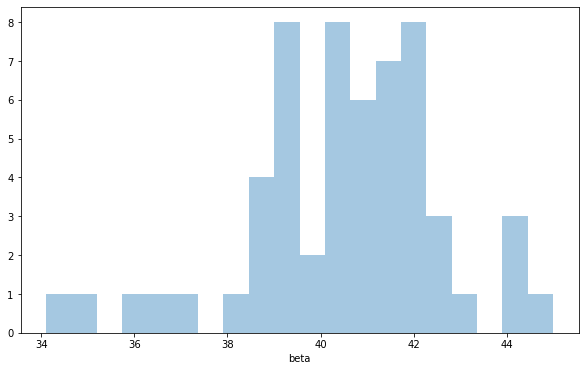

In [5]:
plt.figure(figsize=[10,6])
sns.distplot(df['beta'], kde=False, bins=20)
plt.show()

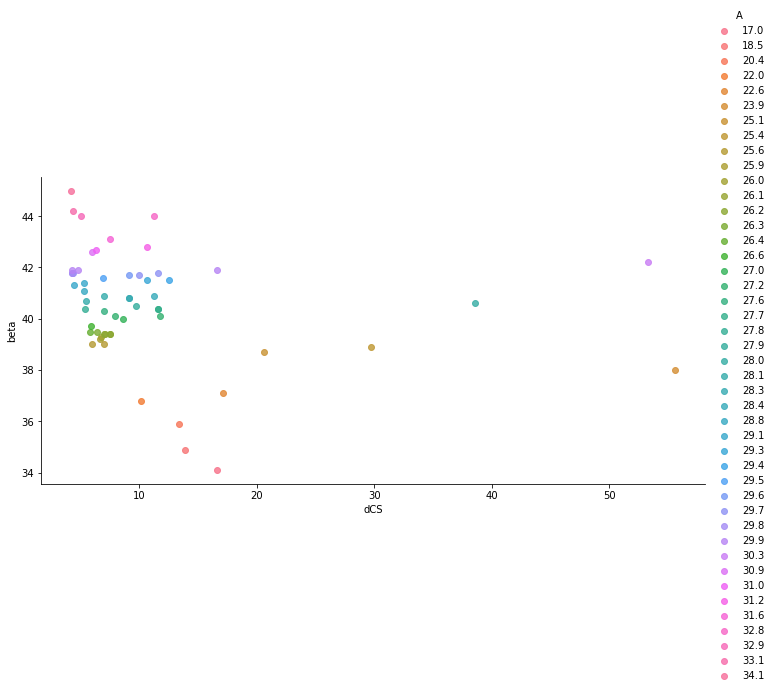

In [6]:
sns.lmplot('dCS', 'beta', data=df, fit_reg= False, aspect=2, size =5, hue='A')
plt.show()

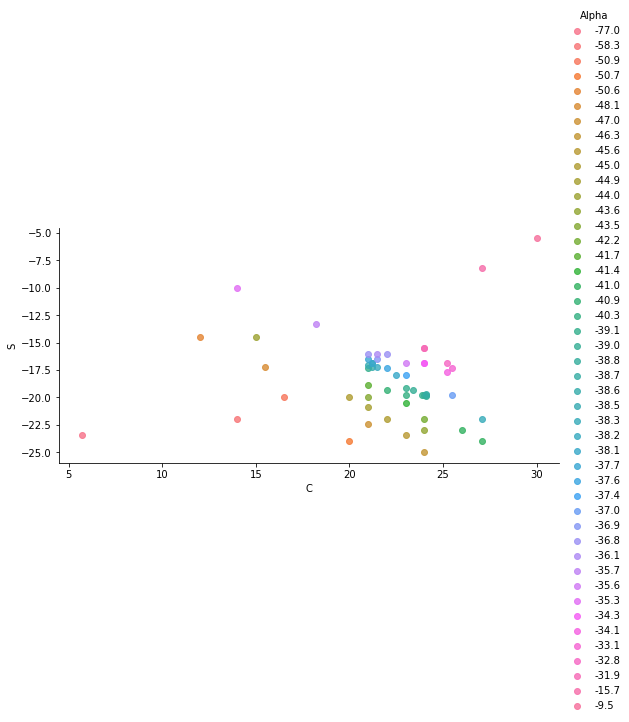

In [7]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Alpha')
plt.show()

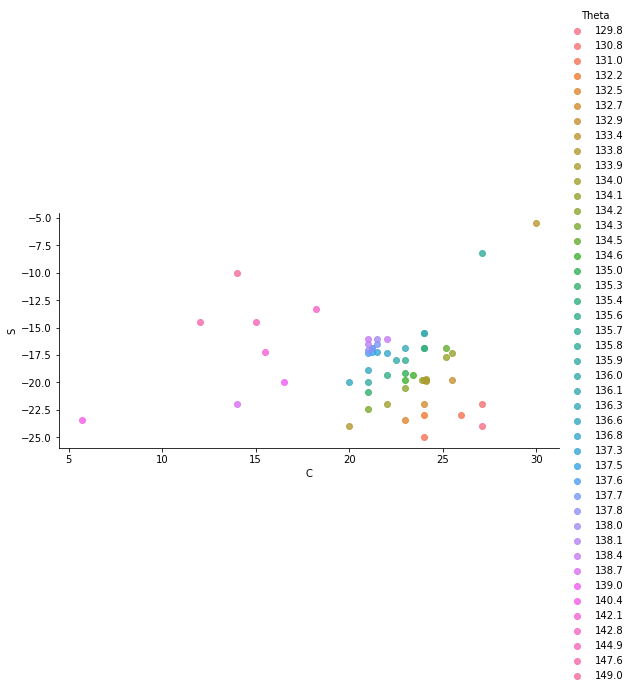

In [8]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Theta')
plt.show()

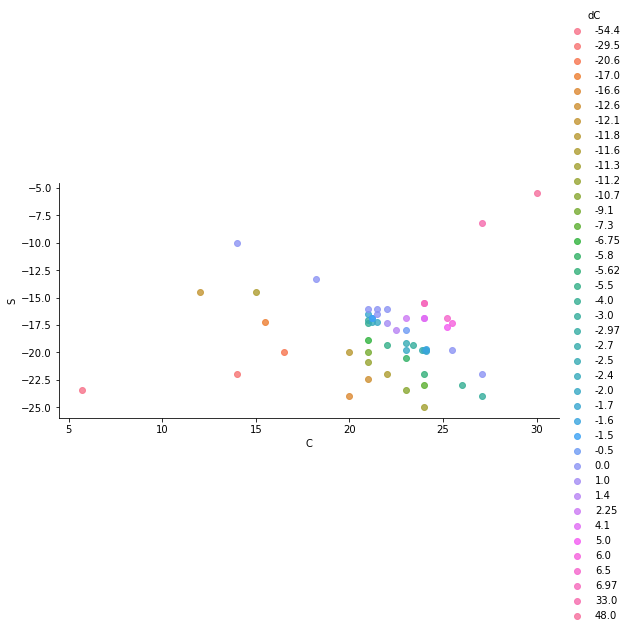

In [9]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dC')
plt.show()

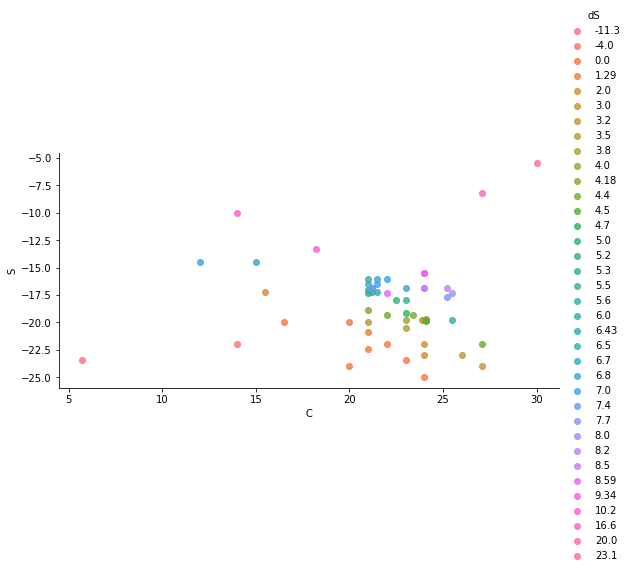

In [10]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dS')
plt.show()

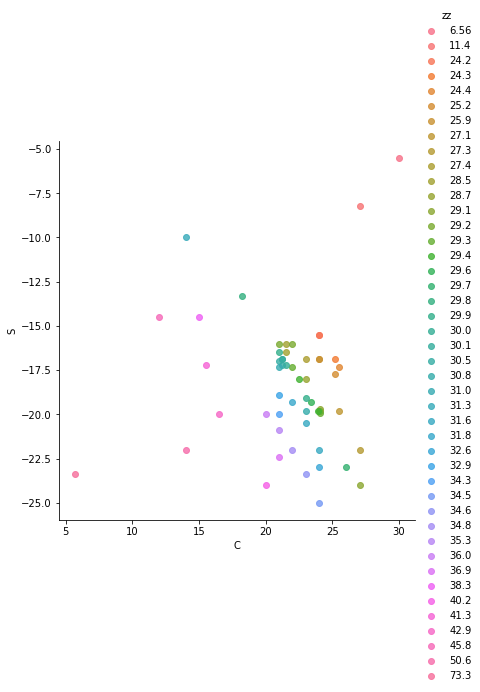

In [11]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=1, size =6, hue='zz')
plt.show()

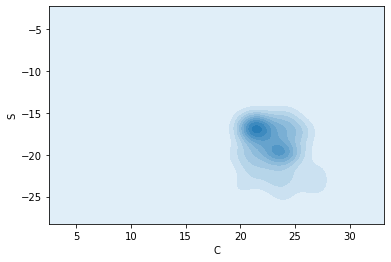

In [12]:
sns.kdeplot(df['C'], df['S'], shade=True)
plt.show()

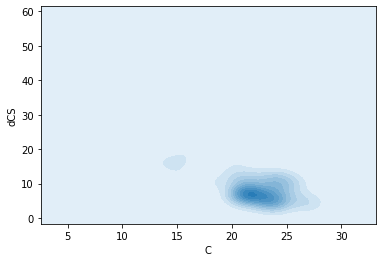

In [13]:
sns.kdeplot(df['C'], df['dCS'], shade=True)
plt.show()

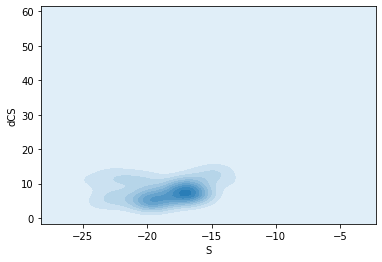

In [14]:
sns.kdeplot(df['S'], df['dCS'], shade=True)
plt.show()

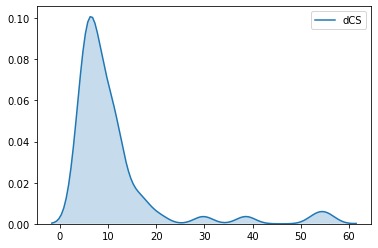

In [15]:
sns.kdeplot(df['dCS'], shade=True)
plt.show()

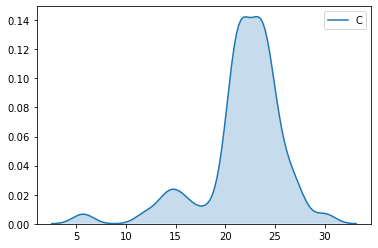

In [16]:
sns.kdeplot(df['C'], shade=True)
plt.show()

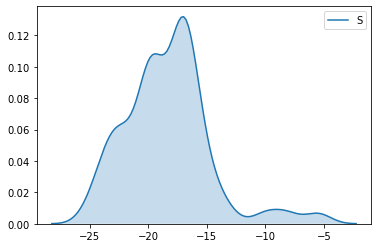

In [17]:
sns.kdeplot(df['S'], shade=True)
plt.show()

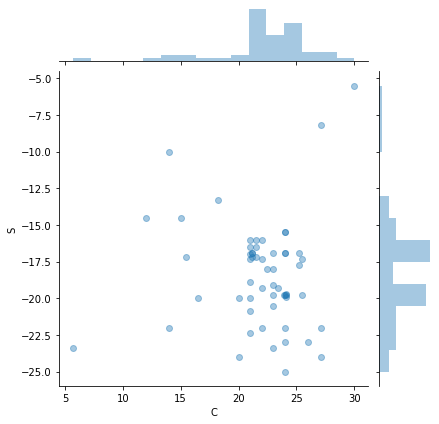

In [18]:
sns.jointplot('C', 'S', data=df, alpha=0.4)
plt.show()



In [19]:
# data = [
#     go.Bar(
#         x=df['S'],
#         y=df['dS'],
#     )
# ]
#
# layout = go.Layout(
#     title='Abweichungen dS in Abhängigkeit von S'
# )
#
# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='Abweichungen dS in Abhängigkeit von S')
# plt.show()

In [20]:
# data = [
#     go.Bar(
#         x=df['S'],
#         y=df['dS'],
#     )
# ]
#
# layout = go.Layout(
#     title='Abweichungen dS in Abhängigkeit von S'
# )
#
# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='test_chart_layout_01')
# plt.show()

In [21]:
# p1 = df.iplot(
# x='dC',
# y='dS',
# # Specify the category
# categories='S',
# xTitle='dC',
# yTitle='dS',
# title='Abweichungen dC und dS in Abhängigkeit von S')
# plt.show()

In [22]:
# df.iplot(
# x='dC',
# y='dS',
# # Specify the category
# categories='C',
# xTitle='dC',
# yTitle='dS',
# title ='dC und dS in Abhängigkeit von C.html')
# plt.show()

In [23]:
figure = ff.create_scatterplotmatrix(
df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
width=2000, height=2000,
diag='histogram',
index='dCS',
title='Scatterplot Matrix dCS')
plot(figure, filename='plotly_scatterplot_dCS.html')
figure.show()

In [24]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
# width=2000, height=2000,
# diag='histogram',
# index='dS',
# title='Scatterplot Matrix dS')
# plot(figure, filename='plotly_scatterplot_dS.html')
# figure.show()

In [25]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
# width=2000, height=2000,
# diag='histogram',
# index='A')
# plot(figure, filename='plotly_scatterplot_A.html')
# figure.show()

In [26]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
# width=2000, height=2000,
# diag='histogram',
# index='Alpha')
# plot(figure, filename='plotly_scatterplot_Alpha.html')
# figure.show()

In [27]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
# width=2000, height=2000,
# diag='histogram',
# index='beta')
# plot(figure, filename='plotly_scatterplot_beta.html')
# figure.show()

In [28]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='C')
# plot(figure, filename='plotly_scatterplot_C.html')
# figure.show()

In [29]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
# width=2000, height=2000,
# diag='histogram',
# index='S')
# plot(figure, filename='plotly_scatterplot_S.html')
# figure.show()

In [30]:
figure = ff.create_scatterplotmatrix(
df[['C','S','T','A','Alpha','Theta','beta','dC','dS', 'zz', 'dCS', 'VCS', 'C+S', 'C/S']],
width=2000, height=2000,
diag='histogram',
index='T')
plot(figure, filename='plotly_scatterplot_T.html')
figure.show()

In [31]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot, )
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot)
# plt.show()
# g.savefig("pair_grid_C_S")

In [32]:
# sns.countplot(y = 'A', data=df)
# plt.show()

In [33]:
# sns.countplot(y = 'dCS', data=df)
# plt.show()

In [34]:
# fig = go.Figure(go.Box(
#         x=df.C,
#         y=df.S))
# py.iplot(fig, filename='sns_boxplot_C_S.html')
# fig.show()

In [35]:
corrs = df.corr()
figure = ff.create_annotated_heatmap(
z=corrs.values,
x=list(corrs.columns),
y=list(corrs.index),
annotation_text=corrs.round(2).values,
showscale=True)
figure['layout']['yaxis']['autorange'] = "reversed"
plot(figure, filename='heatmap_corr.html')
figure.show()

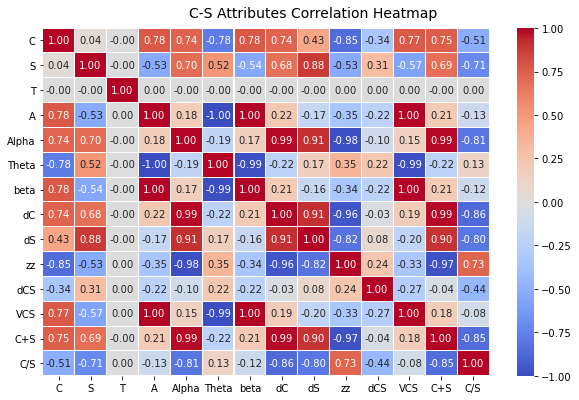

In [36]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('C-S Attributes Correlation Heatmap', fontsize=14)
f.savefig("heatmap_C_S")

In [37]:
model = smf.ols(formula='dS ~ S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())



                            OLS Regression Results                            
Dep. Variable:                     dS   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.50e-19
Time:                        01:31:10   Log-Likelihood:                -129.93
No. Observations:                  57   AIC:                             263.9
Df Residuals:                      55   BIC:                             267.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3341      1.630     16.766      0.0

In [38]:
model = smf.ols(formula='dC ~ C', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                     dC   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     68.57
Date:                Tue, 19 May 2020   Prob (F-statistic):           3.05e-11
Time:                        01:31:10   Log-Likelihood:                -203.03
No. Observations:                  57   AIC:                             410.1
Df Residuals:                      55   BIC:                             414.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.4228      6.402     -8.657      0.0

In [39]:
model = smf.ols(formula='dCS ~ C + S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                    dCS   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     7.679
Date:                Tue, 19 May 2020   Prob (F-statistic):            0.00116
Time:                        01:31:10   Log-Likelihood:                -206.19
No. Observations:                  57   AIC:                             418.4
Df Residuals:                      54   BIC:                             424.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.3962      9.357      5.065      0.0

In [40]:
model = smf.ols(formula='dC ~ Alpha', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())

                            OLS Regression Results                            
Dep. Variable:                     dC   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2565.
Date:                Tue, 19 May 2020   Prob (F-statistic):           7.78e-48
Time:                        01:31:10   Log-Likelihood:                -115.99
No. Observations:                  57   AIC:                             236.0
Df Residuals:                      55   BIC:                             240.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.1876      1.162     46.645      0.0

In [41]:
model = smf.ols(formula='dS ~ Alpha', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())

                            OLS Regression Results                            
Dep. Variable:                     dS   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     269.9
Date:                Tue, 19 May 2020   Prob (F-statistic):           7.15e-23
Time:                        01:31:10   Log-Likelihood:                -122.03
No. Observations:                  57   AIC:                             248.1
Df Residuals:                      55   BIC:                             252.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9445      1.292     20.086      0.0

In [42]:
model = smf.ols(formula='Alpha ~ dC + dS ', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                  Alpha   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1326.
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.26e-46
Time:                        01:31:10   Log-Likelihood:                -93.024
No. Observations:                  57   AIC:                             192.0
Df Residuals:                      54   BIC:                             198.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -38.4469      0.540    -71.191      0.0

In [43]:
model = smf.ols(formula='C ~ Alpha + S ', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 19 May 2020   Prob (F-statistic):           2.20e-45
Time:                        01:31:10   Log-Likelihood:                -51.206
No. Observations:                  57   AIC:                             108.4
Df Residuals:                      54   BIC:                             114.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3807      0.430     65.961      0.0